In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AkarshVyas/Machine-Learning-Part-1/refs/heads/main/insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## EDA

In [4]:
df.shape

(1338, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
numeric_col = ["age","bmi","charges","children"]

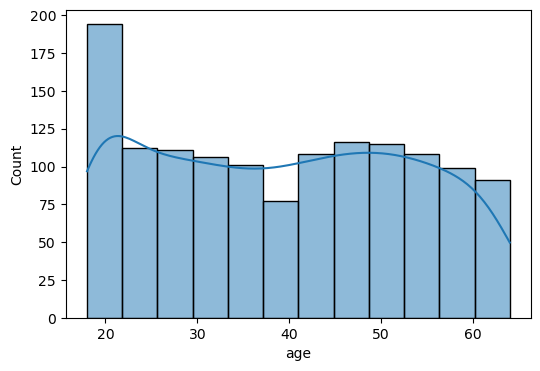

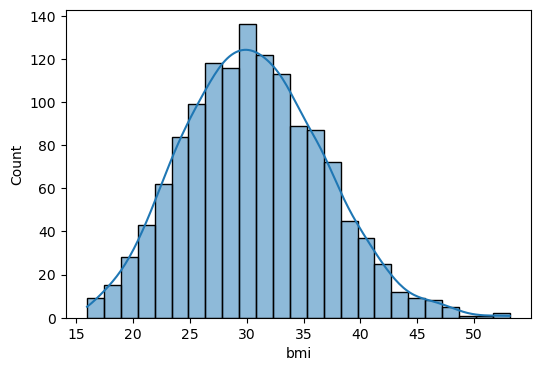

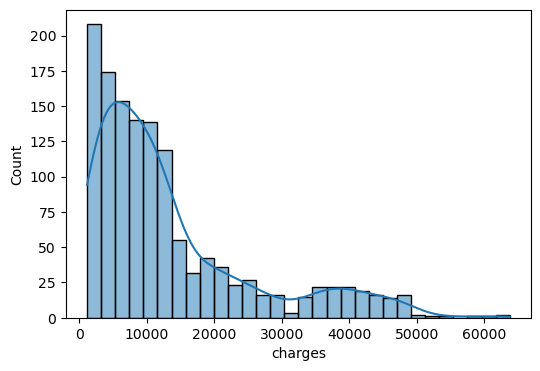

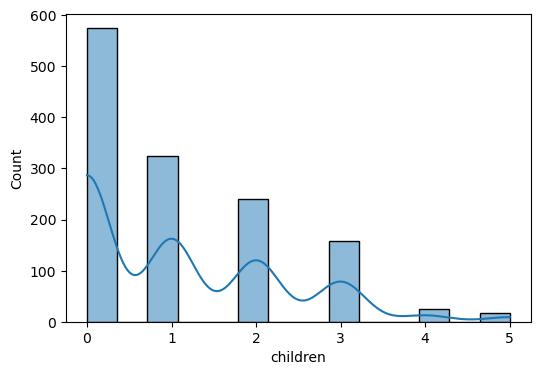

In [11]:
for col in numeric_col:
    plt.figure(figsize = (6,4)) # means 600*400 pixels 
    sns.histplot(df[col],kde =True)

<Axes: xlabel='sex', ylabel='count'>

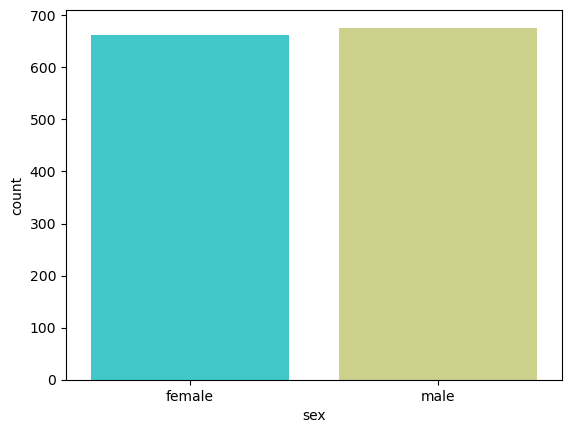

In [12]:
sns.countplot(x = df["sex"],palette = "rainbow")

<Axes: xlabel='smoker', ylabel='count'>

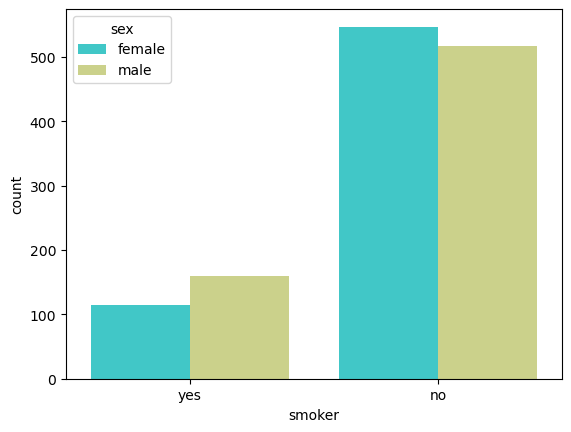

In [13]:
sns.countplot(x = "smoker",palette = "rainbow", hue = "sex" , data = df)

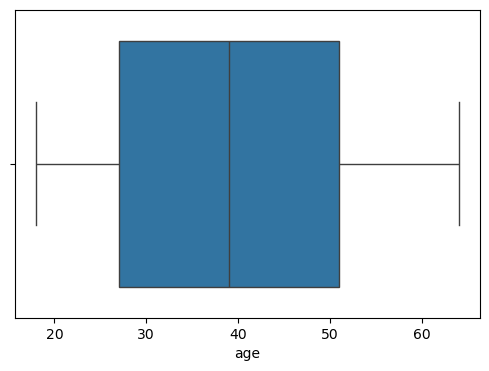

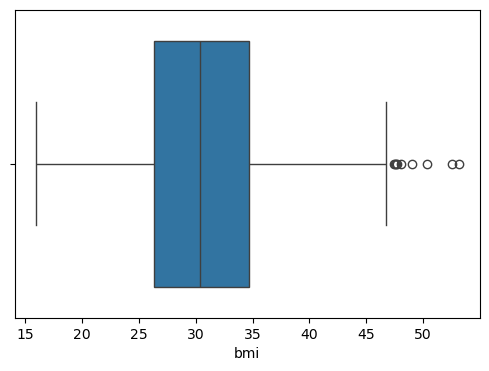

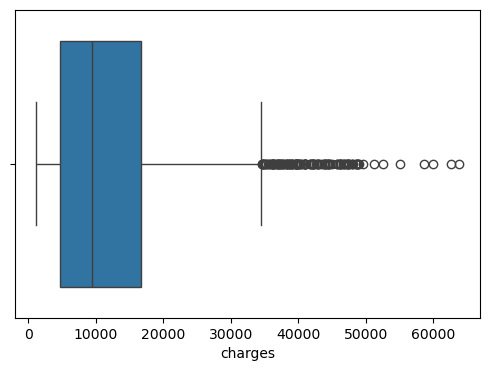

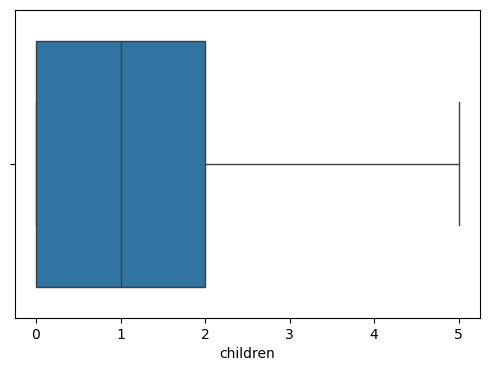

In [14]:
for col in numeric_col  :
    plt.figure(figsize = (6,4))
    sns.boxplot(x = df[col])

<Axes: >

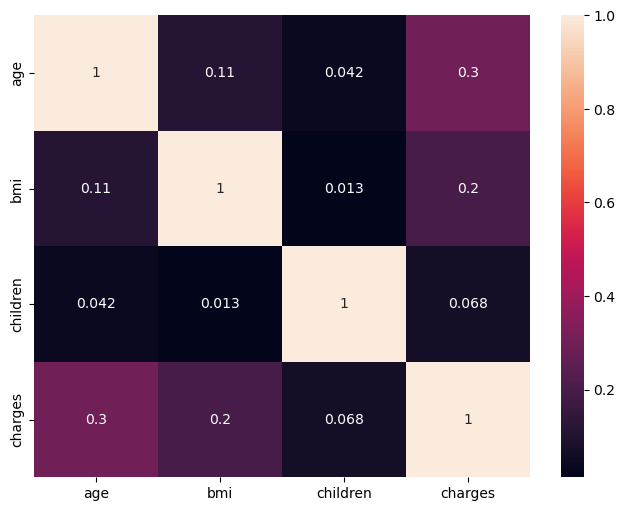

In [15]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(numeric_only= True), annot = True)  
#cannot is show correlation cofficient value and numeric only found the correlation between numeric value from dataframe

## Data Cleaning and Processing

In [16]:
df_cln = df.copy()   # copy dataframe to df_cln

In [17]:
df_cln.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
df_cln.shape

(1338, 7)

In [19]:
df_cln.drop_duplicates(inplace =True)

In [20]:
df_cln.shape

(1337, 7)

In [21]:
df_cln.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
df_cln.dtypes # show the data type of all columns

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [23]:
df_cln["sex"].value_counts() # to check here for how many differnt type male female written like Male MALE M etc 

sex
male      675
female    662
Name: count, dtype: int64

In [24]:
df_cln["sex"] = df_cln["sex"].map({
    "male":0,
    "female":1
})

In [25]:
df_cln.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [26]:
df_cln["smoker"].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [27]:
df_cln["smoker"] = df_cln["smoker"].map({
    "yes":0 ,"no":1
})

In [28]:
df_cln.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520


In [29]:
df_cln.rename(columns = {"sex":"is_female" , "smoker" :"is_smoker" },inplace =True)
# change the name of column in dataframe

In [30]:
df_cln.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520


In [31]:
df_cln["region"].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [32]:
df_cln = pd.get_dummies(df_cln , columns = ["region"])

In [33]:
df_cln.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,0,16884.92400,False,False,False,True
1,18,0,33.770,1,1,1725.55230,False,False,True,False
2,28,0,33.000,3,1,4449.46200,False,False,True,False
3,33,0,22.705,0,1,21984.47061,False,True,False,False
4,32,0,28.880,0,1,3866.85520,False,True,False,False


In [34]:
df_cln = df_cln.astype(int)

## Feature Engineering and Extraction 

<Axes: xlabel='bmi', ylabel='Count'>

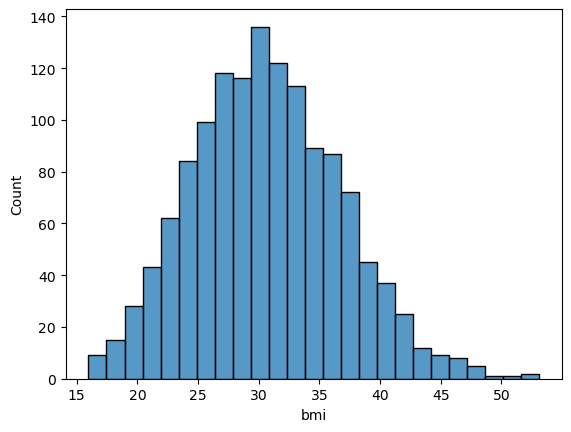

In [35]:
sns.histplot(df["bmi"])

In [36]:
df_cln["bmi_category"]= pd.cut(
    df_cln["bmi"],
    bins= [0,18.5,24.9,29.9,float("inf")],
    labels = ["underweight","normal","overweight","obese"]
)

In [37]:
df_cln.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,0,16884,0,0,0,1,overweight
1,18,0,33,1,1,1725,0,0,1,0,obese
2,28,0,33,3,1,4449,0,0,1,0,obese
3,33,0,22,0,1,21984,0,1,0,0,normal
4,32,0,28,0,1,3866,0,1,0,0,overweight


In [38]:
df_cln = pd.get_dummies(df_cln, columns = ["bmi_category"])

In [39]:
df_cln.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_underweight,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,19,1,27,0,0,16884,0,0,0,1,False,False,True,False
1,18,0,33,1,1,1725,0,0,1,0,False,False,False,True
2,28,0,33,3,1,4449,0,0,1,0,False,False,False,True
3,33,0,22,0,1,21984,0,1,0,0,False,True,False,False
4,32,0,28,0,1,3866,0,1,0,0,False,False,True,False


In [40]:
df_cln = df_cln.astype(int)

In [41]:
df_cln.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_underweight,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,19,1,27,0,0,16884,0,0,0,1,0,0,1,0
1,18,0,33,1,1,1725,0,0,1,0,0,0,0,1
2,28,0,33,3,1,4449,0,0,1,0,0,0,0,1
3,33,0,22,0,1,21984,0,1,0,0,0,1,0,0
4,32,0,28,0,1,3866,0,1,0,0,0,0,1,0


## Feature scaling

In [42]:
from sklearn.preprocessing import StandardScaler
cols = ["age","bmi","children"]
scaler = StandardScaler()

df_cln[cols] = scaler.fit_transform(df_cln[cols])

In [43]:
df_cln.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_underweight,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,-1.440418,1,-0.517949,-0.909234,0,16884,0,0,0,1,0,0,1,0
1,-1.511647,0,0.462463,-0.079442,1,1725,0,0,1,0,0,0,0,1
2,-0.799350,0,0.462463,1.580143,1,4449,0,0,1,0,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,1,21984,0,1,0,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,1,3866,0,1,0,0,0,0,1,0


In [44]:
from scipy.stats import pearsonr
selected_features = ['age', 'is_female', 'bmi', 'children', 'is_smoker',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_underweight', 'bmi_category_normal',
       'bmi_category_overweight', 'bmi_category_obese',
       ]
correlations = {
    feature: pearsonr(df_cln[feature],df_cln["charges"])[0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()),columns = ["feature","pearson correlation"])
correlation_df.sort_values(by="pearson correlation", ascending =False)

,feature,pearson correlation
0,age,0.298309
12,bmi_category_obese,0.200348
2,bmi,0.196236
7,region_southeast,0.073577
3,children,0.067390
5,region_northeast,0.005946
6,region_northwest,-0.038695
8,region_southwest,-0.043637
9,bmi_category_underweight,-0.050599
1,is_female,-0.058046


In [45]:
cat_features = [
    'is_female', 'is_smoker', 
    'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_underweight', 'bmi_category_normal',
    'bmi_category_overweight', 'bmi_category_obese'
]

In [46]:
from scipy.stats import chi2_contingency

alpha = 0.05
df_cln["charges_bin"]= pd.qcut(df_cln["charges"],q=4,labels= False)
chi2_results = {}
for col in cat_features:
    # Create contingency table
    contingency = pd.crosstab(df_cln[col], df_cln["charges_bin"])

    # Perform Chi-Square Test
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = "reject null (keep feature)" if p_val < alpha else "accept null (drop feature)"
    chi2_results[col] ={
        'chi2_statistic': chi2_stat,
        "p_value" :p_val,
        "decision": decision 
    }
chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by = "p_value")
chi2_df    

,chi2_statistic,p_value,decision
is_smoker,848.219178,0.0,reject null (keep feature)
region_southeast,15.998167,0.001135,reject null (keep feature)
is_female,10.258784,0.01649,reject null (keep feature)
bmi_category_obese,8.515711,0.036473,reject null (keep feature)
region_northeast,6.438442,0.092122,accept null (drop feature)
region_southwest,5.091893,0.165191,accept null (drop feature)
bmi_category_overweight,4.25149,0.235557,accept null (drop feature)
bmi_category_normal,3.708088,0.29476,accept null (drop feature)
bmi_category_underweight,3.37403,0.337471,accept null (drop feature)
region_northwest,1.13424,0.768815,accept null (drop feature)


In [47]:
final_df= df_cln[["age","bmi","children","charges","is_smoker","region_southeast","is_female", "bmi_category_obese"]]

In [48]:
final_df

,age,bmi,children,charges,is_smoker,region_southeast,is_female,bmi_category_obese
0,-1.440418,-0.517949,-0.909234,16884,0,0,1,0
1,-1.511647,0.462463,-0.079442,1725,1,1,0,1
2,-0.799350,0.462463,1.580143,4449,1,1,0,1
3,-0.443201,-1.334960,-0.909234,21984,1,0,0,0
4,-0.514431,-0.354547,-0.909234,3866,1,0,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,-0.027743,1.580143,10600,1,0,0,1
1334,-1.511647,0.135659,-0.909234,2205,1,0,1,1
1335,-1.511647,0.952670,-0.909234,1629,1,1,1,1
1336,-1.297958,-0.844753,-0.909234,2007,1,0,1,0


## ML2 Sheriyan AI Linear regression

### Train test Spilit

In [52]:
from sklearn.model_selection import train_test_split

In [56]:
X = final_df.drop("charges",axis = 1)
y= final_df["charges"]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression

In [60]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [62]:
y_pred =model.predict(X_test)

In [63]:
y_pred

array([ 7856.41808069,  5379.07145062, 14613.47489419, 32465.93193508,
        8955.35729283, 13336.43605749, 30199.07309038,  1403.40503994,
       11196.90873514, 10018.65838301, 10818.71629044, 32144.43533014,
       31550.26059902, 16230.55597963, 10285.99989714,  8488.6608457 ,
        5487.64476113, 32465.09672212,  3304.46601962,  3877.00422671,
        4760.01023433, 28796.29743032, 13870.98195763, 29541.88243902,
       31520.15678042,  6344.44675222, 35026.69683204, 37880.73853364,
       12490.06211178, 14238.95332785,  7573.09915473, 13049.08020135,
         516.21534048, 11339.74207305, 37584.28749479, 13356.84393437,
        3706.96614326,  4537.12786929, 31481.80485676,  8009.55465514,
        6075.79442888, 30404.81913857, 35276.56346051, 13099.59189682,
        7977.69705664,  2987.00634487,  5174.11237148,  7620.54073087,
        3522.89053725, 10388.99625751,  7820.00530896, 10505.68054495,
       30331.09138384,  4687.62077185, 11676.0149257 , 11446.77536361,
      

In [65]:
y_test

900      8688
1064     5708
1256    11436
298     38746
237      4463
        ...  
534     13831
542     13887
760      3925
1284    47403
1285     8534
Name: charges, Length: 268, dtype: int64

In [66]:
# for camparison we use model evoluation r2 ar2

In [71]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 =1-((1-r2)*(n-1))/(n-p-1)
print(adj_r2)

0.8040712413347118
0.7987962362937232
